## Data understanding GDELT'S event dataset

The aim of this notebook is to understand the nature of the event dataset provided by GDELT's project open source database. With the main purpose of analyzing how useful can be this data for creating an ML model that is able to predict alert state changes in the counties of south sudan. This would be one of the multiple source that will be used to make an inclusive dataset that gathers information about:

- Previous alert state changes.
- Incidents occurred in different counties of South Sudan (Recorded in Sherpa's database).
- GDELT's Event dataset (incidents from different sources).

It's assumed that these sources are connected by a given timeframe (a week's time as alert states are changed weekly) and geolocation.

#### About the dataset that this notebook will be focussed:

- Contains records of incidents/events that have happened in South Sudan between 2020 - 2022.
- Provides information about the actors of the events that took place. However, this values are often left blank.

#### Fields of every record: 

- Sources that reported each incident (News media mainly).
- Number of Mentions, Number of Sources and Number of articles of each event. GDELT's provides these as a way of assessing the importance of a given event.
- Average tone of all documents that refer to the event. Ranges from -100 (Extremely negative) to 100 (Extremely positive).
- Goldstein rating that captures the potential impact that an event may have on the stability of a country. It's merely based on the event type not on the specifics. Varies between -10 to 10 (Decimals).
- Action geolocation full name, provides the English name of the location where the action took place between the actors. Some records include just the name, some others the name of the city followed by the region and country (South Sudan).

### Tasks:

- Check what proportion of the dataset records have information about the actors.
- Understand how many sources report these events.
- Explore changes in the average tone and goldsteing scale.
- Determine if the locations of each records in the dataset are specific enough. Alert states are county specific, are most of the events county specific as well? or they may only be used to determine a country level average tone, goldstain or impact?.


In [20]:
# import libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import urlparse

plt.rcParams["figure.figsize"] = (10,8)

# impport dataset
df = pd.read_excel('./SSD.xlsx')
n_entries = df.shape[0]
df.head(5)

,GLOBALEVENTID,SQLDATE,MonthYear,Year,FractionDate,Actor1Code,Actor1Name,Actor1CountryCode,Actor1KnownGroupCode,Actor1EthnicCode,...,ActionGeo_Type,ActionGeo_FullName,ActionGeo_CountryCode,ActionGeo_ADM1Code,ActionGeo_ADM2Code,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,DATEADDED,SOURCEURL
0,1016925263,20211201,202112,2021,2021.9068,RAD,EXTREMIST,NaN,NaN,NaN,...,1,South Sudan,OD,OD,NaN,8.00000,30.0000,OD,20211201020000,https://mainichi.jp/english/articles/20211130/...
1,1016934883,20211201,202112,2021,2021.9068,NaN,NaN,NaN,NaN,NaN,...,5,"Central Equatoria State, Wilayat Bahr al Jabal...",OD,OD01,37035.0,4.75000,31.0000,315396,20211201033000,https://venturesafrica.com/apostories/new-proj...
2,1016935155,20211201,202112,2021,2021.9068,CVL,COMMUNITY,NaN,NaN,NaN,...,4,"Morobo, Wilayat Bahr al Jabal, South Sudan",OD,OD01,37035.0,3.68957,30.7795,-11441,20211201033000,https://venturesafrica.com/apostories/new-proj...
3,1016935156,20211201,202112,2021,2021.9068,CVL,COMMUNITY,NaN,NaN,NaN,...,5,"Central Equatoria State, Wilayat Bahr al Jabal...",OD,OD01,37035.0,4.75000,31.0000,315396,20211201033000,https://venturesafrica.com/apostories/new-proj...
4,1016935157,20211201,202112,2021,2021.9068,CVL,COMMUNITY,NaN,NaN,NaN,...,5,"Central Equatoria State, Wilayat Bahr al Jabal...",OD,OD01,37035.0,4.75000,31.0000,315396,20211201033000,https://venturesafrica.com/apostories/new-proj...


## Actors of events

Is this a field we should take into consideration?

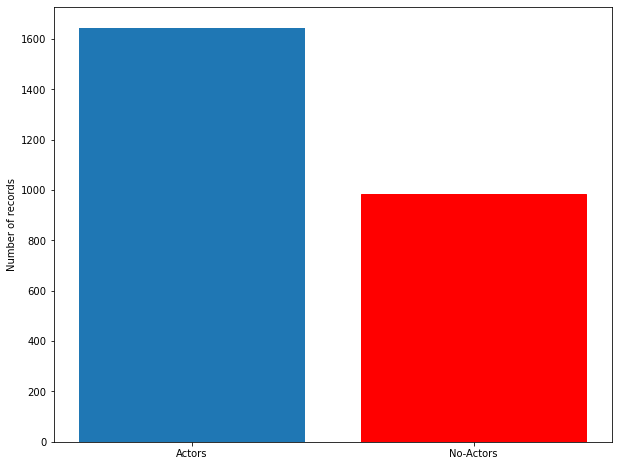

In [21]:
# Records that don't contain data about the actors
records_without_actors = len(df[df['Actor1Code'].isnull() | df['Actor2Code'].isnull()])
records_with_actors = n_entries - records_without_actors

plt.figure(figsize=(10,8))

labels = ['Actors', 'No-Actors']
records = [records_with_actors, records_without_actors]
records_bar = plt.bar(labels, records)
records_bar[1].set_color('r')

plt.ylabel('Number of records')

plt.show()

In [22]:
# Percentage of records that are missing the actors' data
percentage_missing_actors = records_without_actors * 100 / n_entries
print("The percentage of records that are missing the actors' details is: {:.2f}%".format(percentage_missing_actors))

The percentage of records that are missing the actors' details is: 37.45%


<AxesSubplot:xlabel='Actor1CountryCode', ylabel='count'>

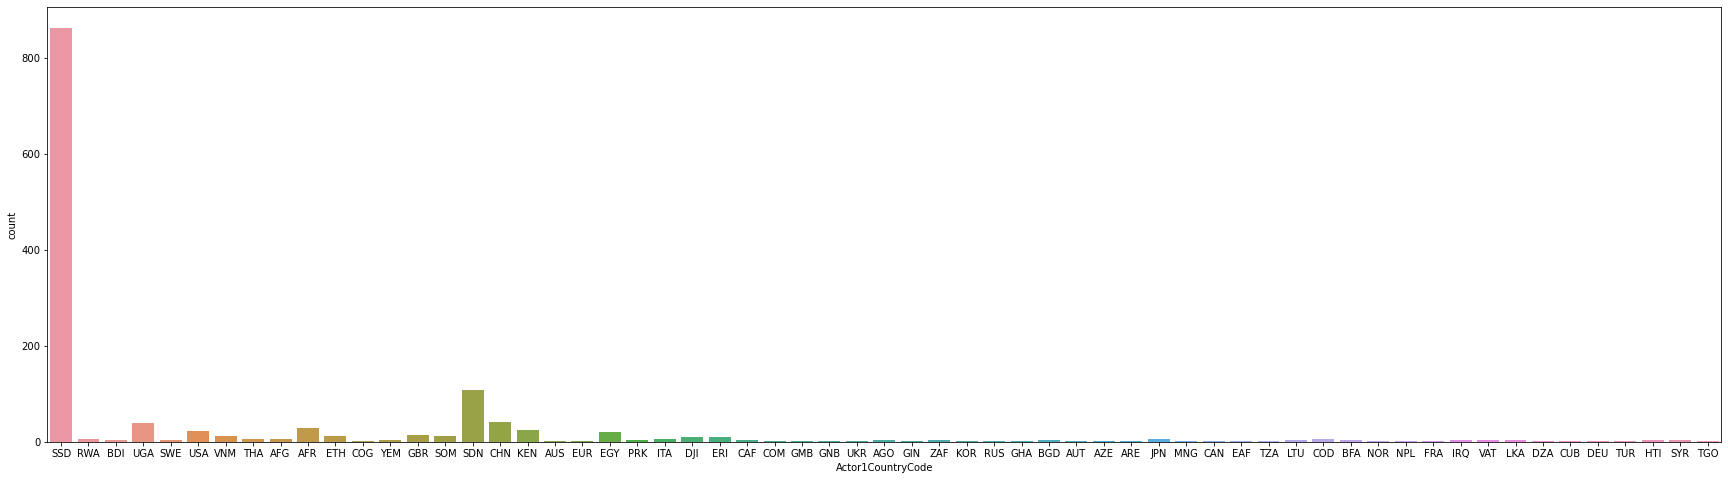

In [65]:
background = '#dcd5f7'
plt.figure(figsize=(30,8))

sns.countplot(data=df, x='Actor1CountryCode', fill=True, alpha=1)

<AxesSubplot:xlabel='Actor2CountryCode', ylabel='count'>

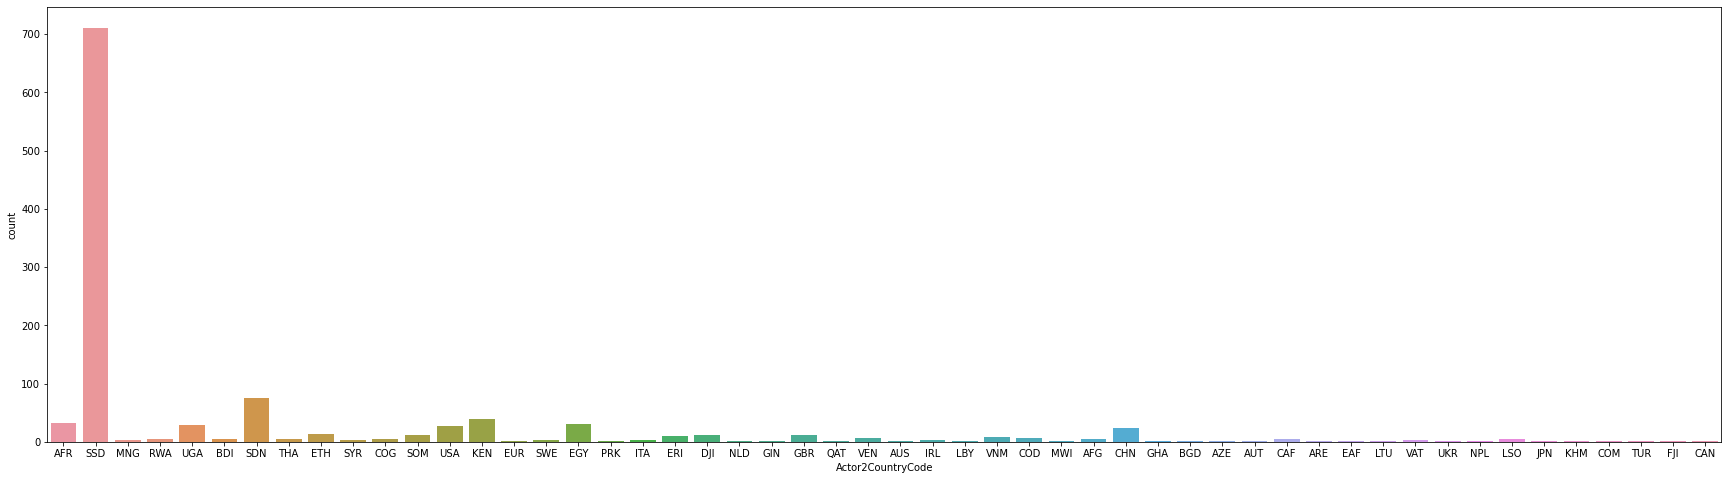

In [66]:
plt.figure(figsize=(30,8))

sns.countplot(data=df, x='Actor2CountryCode', fill=True, alpha=1)

## Sources

In [23]:
# Extract specific domains (Assuming that every domain is a different company)

sources = df.SOURCEURL.apply(lambda url: urlparse(url).netloc).drop_duplicates()
n_sources = len(sources)

print("There is a total of {} different sources that report the events contained in this dataset".format(n_sources))

There is a total of 253 different sources that report the events contained in this dataset


# Goldstein Scale and Average tone

This attributes may be useful to train a model that predicts changes on the alert state.

### Distributions.

Understand the distributions of these variables.

<AxesSubplot:xlabel='AvgTone'>

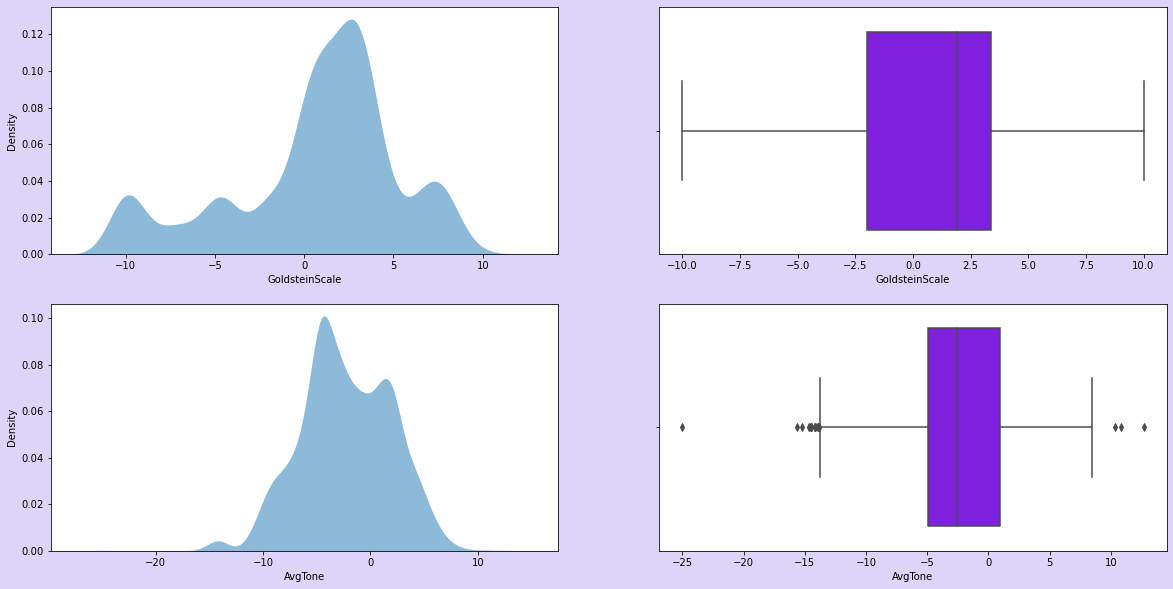

In [24]:
# Distributions of these two potential attributes

background = '#dcd5f7'
fig = plt.figure(figsize=(20,10))
fig.patch.set_facecolor(background)

gs = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

# Goldstain scale attribute
sns.kdeplot(ax=ax0, data=df, x='GoldsteinScale',fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
sns.boxplot(ax=ax1, data=df, x='GoldsteinScale', palette=["#8000ff","#da8829"])

# Average tone attribute
sns.kdeplot(ax=ax2, data=df, x='AvgTone',fill=True, palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)
sns.boxplot(ax=ax3, data=df, x='AvgTone', palette=["#8000ff","#da8829"])

In [67]:
df['GoldsteinScale'].median()

1.9

In [68]:
df['GoldsteinScale'].mean()

0.6301140684410674

<AxesSubplot:xlabel='AvgTone', ylabel='GoldsteinScale'>

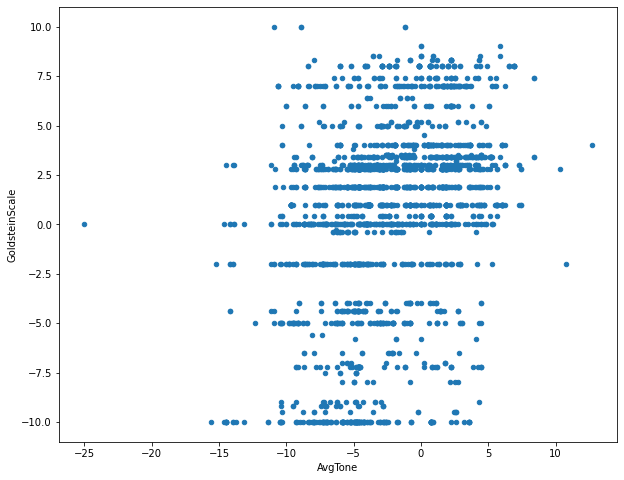

In [25]:
df.plot.scatter('AvgTone', 'GoldsteinScale')

## Locations of the events

In [34]:
# Extract the information that's recorded abbout the location of the event (county | Region | country)
def destructure_location(loc):
    places = loc.split(", ")
    if (len(places) == 1):
        return 'Country'
    else:
        if (places[0] != '' and places[1] != '' and places[2] != ''):
            return 'County, Region and Country'
        elif (places[0] != '' and places[1] == ''):
            return 'County and Country'
        elif (places[0] == '' and places[1] != ''):
            return 'Region and Country'
        else:
            return 'No match'

In [43]:
df['location_data'] = df.apply(lambda row: destructure_location(row['ActionGeo_FullName']), axis = 1)
df['location_data'].head(5)

0                       Country
1    County, Region and Country
2    County, Region and Country
3    County, Region and Country
4    County, Region and Country
Name: location_data, dtype: object

<AxesSubplot:xlabel='location_data', ylabel='count'>

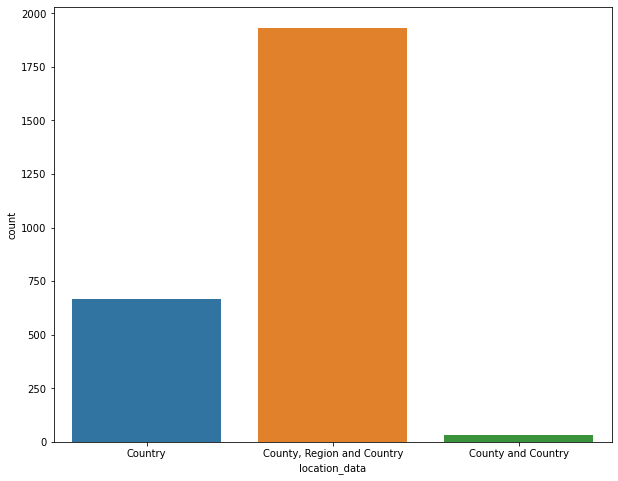

In [46]:
plt.figure(figsize=(10,8))

# Bar graph to display the proportions of the data stored for geolocation of the event.
sns.countplot(data=df, x='location_data', fill=True, alpha=1)

In [52]:
contains_county = len(df[df['location_data'] == 'County and Country'])
contains_county = contains_county + len(df[df['location_data'] == 'County, Region and Country'])
contains_county

1964

In [55]:
# Percentage of records that contain a record of the county
percentage_county = contains_county * 100 / n_entries
print('{:.2f}% of the records contain the county location of where the event took place'.format(percentage_county))

74.68% of the records contain the county location of where the event took place


In [69]:
records_with_null_geoloc = len(df[df['ActionGeo_Long'].isnull() | df['ActionGeo_Lat'].isnull()])
records_with_null_geoloc

0

In [83]:
contains_only_country = len(df[df['location_data'] == 'Country'])
contains_only_country_geoloc = len(df[(df['location_data'] == 'Country') & (df['ActionGeo_Lat'] == 8.0) & (df['ActionGeo_Long'] == 30.0)])
contains_only_country_geoloc

666

<Figure size 864x864 with 0 Axes>

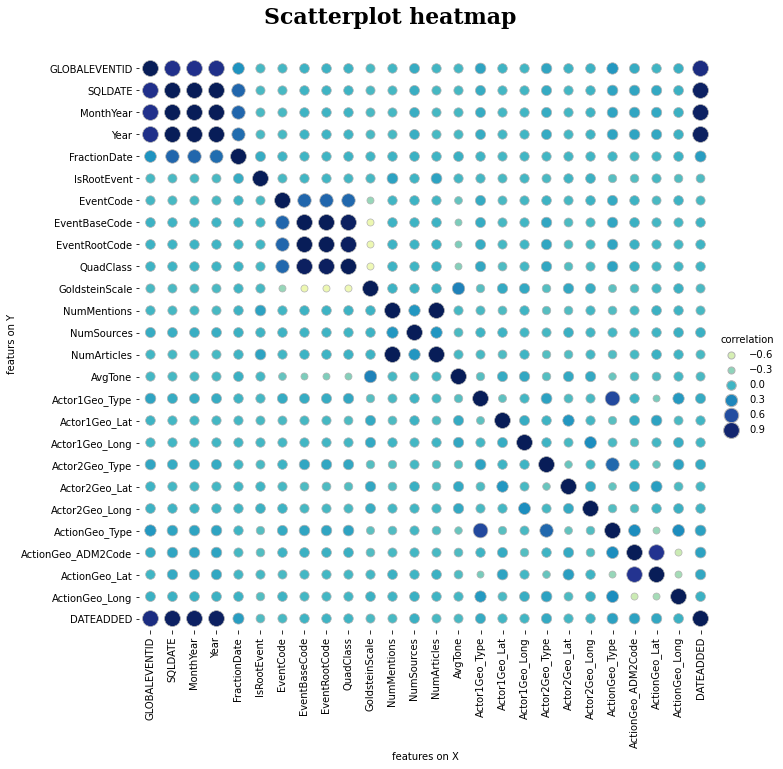

In [56]:
fig = plt.figure(figsize=(12,12))
corr_mat = df.corr().stack().reset_index(name="correlation")
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="YlGnBu", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)
g.set(xlabel="features on X", ylabel="featurs on Y", aspect="equal")
g.fig.suptitle('Scatterplot heatmap',fontsize=22, fontweight='bold', fontfamily='serif', color="#000000")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")
plt.show()

# Conclusions

#### About the actors:

- Around 40% of the records don't provide details of the actors of the events.
- It may not be a good idea to use the attributes belonging to the actors of the events.
- Not all actors are necessarily based in South Sudan.

#### About the sources:

- There's a total number of 253 different sources.

#### About Goldstein Scale:

- Most values oscilate between -2.5 and 2.5 with a median of 1.9 and an average of 0.63.
- The KDE graph shows that this attribute doesn't follow a normal distribution.

#### About avgTone:

- Most values oscilate between -15 and 10, having most records a general average tone.
- There are several outliers with negatives values going down to -25.
- There are other 3 positive outliers whose values are close to 10.

Note: There doesn't seem to be a correlation between avgTone and goldstein. This may makes sense as goldstein scale is only concerned with the event type and not with the specifics of a given record, for example number of people involved, location, etc.

#### About the locations of the events:

- Around 75% of the records contain information about the specific county in which the vent took place. This becomes helpful as alert states are county specific.
- Records that only provide the country have the same geolocation coordinates lat=8 and long=30. This seems to be some default value for events that don't have a specific location.